<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/Python/answer/02a_MLflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 機械学習の基本的な手順

breast cancerデータについて、識別を行うJupyter Notebook (ipynbファイル)を提出してください。その際、k-NN法のkの値を変えて識別実験を行って性能の変化を観察してください。

### パッケージの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

## 学習データの読み込み

In [2]:
bc = load_breast_cancer(as_frame=True)
print(bc.DESCR)
X = bc.data
y = bc.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 前処理

In [9]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
tsne = TSNE(perplexity=30)
X2 = tsne.fit_transform(X)

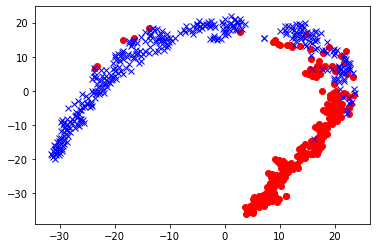

In [5]:
plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"bx")

### 標準化

In [7]:
X_scaled = preprocessing.scale(X)

学習

In [8]:
type(X_scaled)

numpy.ndarray

In [6]:
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, X_scaled, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.95 (+/- 0.05)


### 分割学習法での評価

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

学習用データで識別器の学習を行います．

In [8]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

評価用データに対する混同行列と各種の評価指標を出力します．

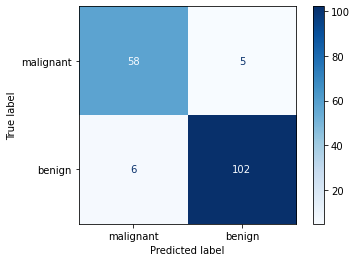

In [9]:
plot_confusion_matrix(clf, X_test, y_test,
                      display_labels=bc.target_names,
                      cmap=plt.cm.Blues,
                      normalize=None)

In [10]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.91      0.92      0.91        63
      benign       0.95      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [11]:
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred, target_names=bc.target_names))


              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        63
      benign       0.94      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [12]:
clf3 = KNeighborsClassifier(n_neighbors=10)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred, target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



もともとのデータがかなりきれいに分離しているので、ハイパーパラメータ調整を行ってもあまり性能の変化はないようです。